In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv") #read dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info() #check all attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isna().sum() #finding attributes with missing cells

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Drop unecessacry column
df = df.drop(['customerID'], axis = 1) 

In [7]:
# column 'TotalCharges' is object, and we have to convert it to numeric value
# errors='coerce' - invalid parsing will be set as NaN
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
#check null
print(df.isnull().sum())

import numpy as np

# after convertion 'TotalCharges' has 11 missing values

tempNaN = df[np.isnan(df['TotalCharges'])]

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Tenure means the number of months the customer has stayed with the company, and the "0" entry is not valid.

In [9]:
# we have to find records with 'tenure' = 0 values
tempTentureZero = df[df['tenure'] == 0]

No additional cases fund.
two strategies for dealing with null entries:

In [10]:
# First strategy - drop records with 'tenure' = 0 values
df.drop(df[df['tenure'] == 0].index, inplace = True)

2) or replace missing values with some other values. In that case, using average is a good strategy.

Delete records with corrupt data.

In [11]:
print('\n\n-------- Null entries are resolved ----------')
print(df.isnull().sum())



-------- Null entries are resolved ----------
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Label Encode Binary data:
Independent variables for machine learning algorithms can typically only have numerical values. :

In [13]:
# Label-Encoding for Categorical Data
# change data type for categorical data candidates
cols = ['gender', 'SeniorCitizen','Partner', 'Dependents', \
            'PhoneService', 'PaperlessBilling', 'Churn']

df[cols] = df[cols].astype('category')
print(df.dtypes)

# label encoding for categorical data candidates
for columns in cols:
    df[columns] = df[columns].cat.codes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling    category
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


**DATA EXPLORATION**

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns #create plots

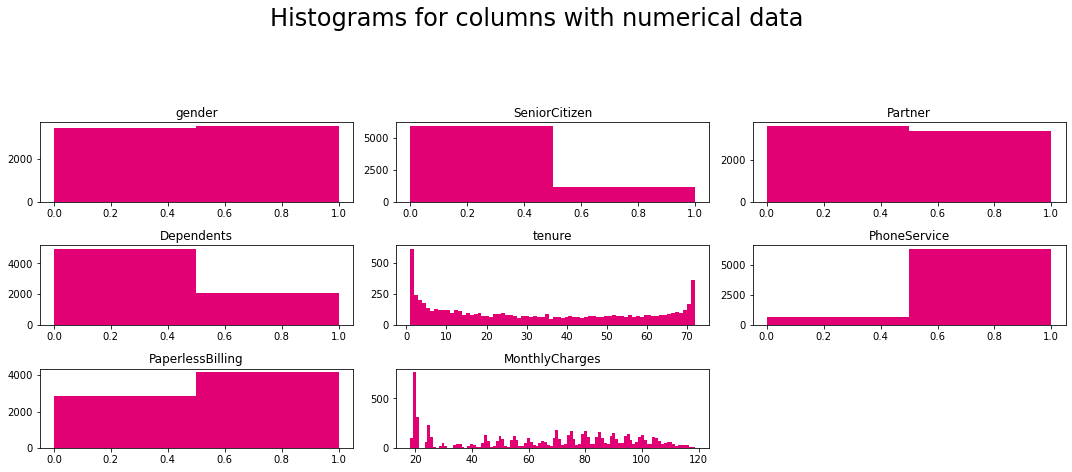

In [15]:
# HISTOGRAMS FOR COLUMNS WITH NUMERICAL DATA

ds_histograms = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges']]   

fig1 = plt.figure(1, figsize=(15, 12))
plt.suptitle('Histograms for columns with numerical data\n', \
                 horizontalalignment="center",fontstyle = "normal", \
                 fontsize = 24, fontfamily = "sans-serif")

for i in range(ds_histograms.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(ds_histograms.columns.values[i])
    vals = np.size(ds_histograms.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(ds_histograms.iloc[:, i], bins=vals, color = '#e20075')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Note: Label-Encoding for gender (customers are 49.5 % female and 50.5 % male).
Female = 0, Male = 1

Based on the histogram, there is a relatively equal proportion of male and female. Most of the customers are members younger population. Almost half of the customers have a partner, but only a few customers have dependents.

A review of the "tenure" histogram reveals a lot of new customers with less than 10 months of service usage, and another loyal segment is customers with more than 70 months of service usage. 

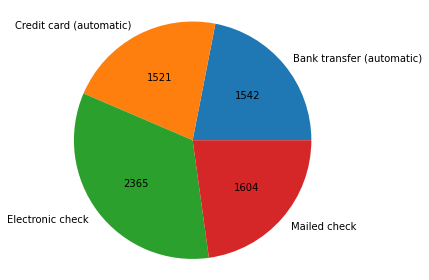

In [16]:
# ANALYZE PAYMENT METHOD
countPaymentMethod = df.groupby('PaymentMethod')['PaymentMethod'].count()

# show absolute values in 'PaymentMethod' groups
total = int(np.sum(df['PaymentMethod'].count()))

mylabels = ["Bank transfer (automatic)", "Credit card (automatic)", "Electronic check", "Mailed check"]

fig2, ax2 = plt.subplots()

# show absolute values in 'PaymentMethod' groups
ax2.pie(countPaymentMethod, labels=mylabels, autopct=lambda p: '{:.0f}'.format(p * total / 100))

# we will set an equal aspect ratio to place pie in a circle
ax2.axis('equal')
plt.tight_layout()
plt.show()

The data show that most customers like to pay their bills electronically, followed by bank transfers, credit cards, and mailed checks.
Just for the visualization exercise as an optional step, we can also include subplots for service data:
 Version with bar charts:

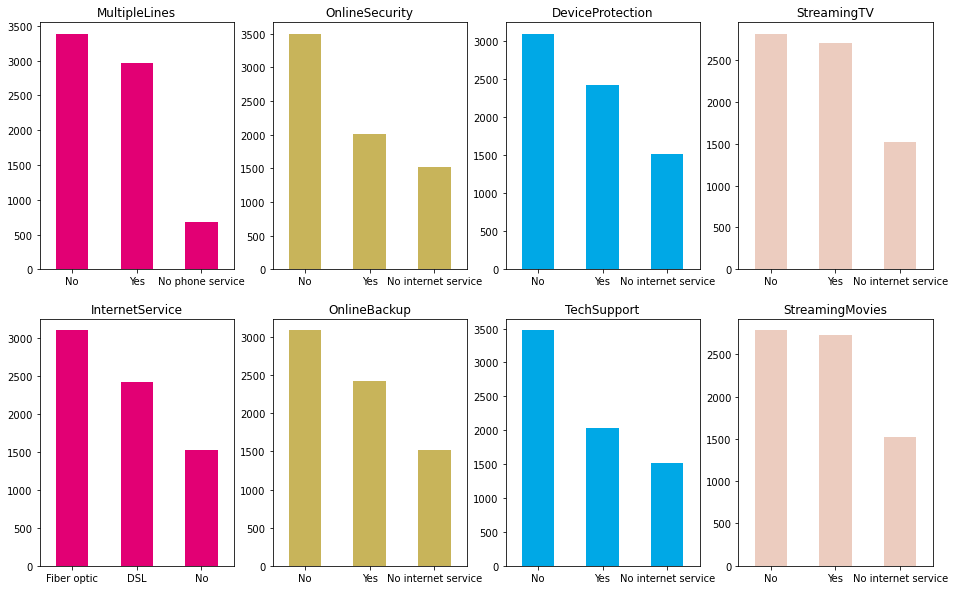

In [17]:
# SUBPLOTS FOR SERVICE DATA

service_labels = ['MultipleLines', 'InternetService','OnlineSecurity',
                'OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies']

# bar charts
fig3, axes = plt.subplots(nrows = 2, ncols = 4,figsize = (16,10))
for i, item in enumerate(service_labels):
    if i < 2:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i,0], rot = 0, color ='#e20074')
        ax.set_title(item)
    elif i >=2 and i < 4:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-2,1], rot = 0,color ='#c8b45a')
        ax.set_title(item)
    elif i >=4 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-4,2],rot = 0,color = '#00a8e6')
        ax.set_title(item)
    elif i < 8:
        ax = df[item].value_counts().plot(kind = 'bar', ax=axes[i-6,3],rot = 0,color = '#ecccbf')
        ax.set_title(item)

Version with pie charts:

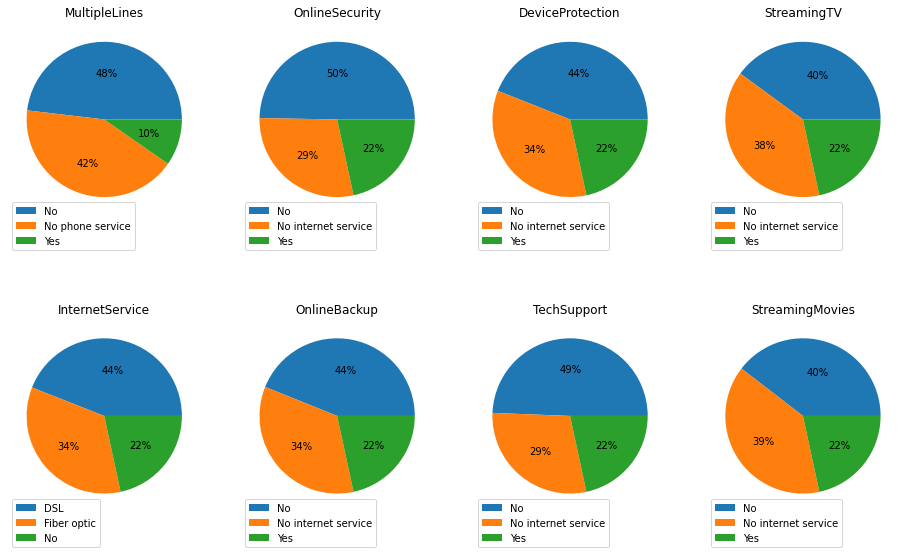

In [18]:

# pie charts
fig4, axes2 = plt.subplots(nrows = 2, ncols = 4,figsize = (16,10))

for i, item in enumerate(service_labels):
    if i < 2:
        ax1 = plt.subplot2grid((2,4), (i,0))
        labels = df.groupby(item).agg('count').index.tolist()
        plt.pie(df[item].value_counts(), autopct='%.0f%%')
        plt.legend(labels, loc='lower left', bbox_to_anchor=(0.0, -0.2))
        ax1.set_title(item)
    elif i >=2 and i < 4:
        ax1 = plt.subplot2grid((2,4), (i-2,1))
        labels = df.groupby(item).agg('count').index.tolist()
        plt.pie(df[item].value_counts(), autopct='%.0f%%')
        plt.legend(labels, loc='lower left', bbox_to_anchor=(0.0, -0.2))
        ax1.set_title(item)
    elif i >=4 and i < 6:
        ax1 = plt.subplot2grid((2,4), (i-4,2))
        labels = df.groupby(item).agg('count').index.tolist()
        plt.pie(df[item].value_counts(), autopct='%.0f%%')
        plt.legend(labels, loc='lower left', bbox_to_anchor=(0.0, -0.2))
        ax1.set_title(item)
    elif i < 8:
        ax1 = plt.subplot2grid((2,4), (i-6,3))
        labels = df.groupby(item).agg('count').index.tolist()
        plt.pie(df[item].value_counts(), autopct='%.0f%%')
        plt.legend(labels, loc='lower left', bbox_to_anchor=(0.0, -0.2))
        ax1.set_title(item)

A very useful data exploration method is also to check the correlation between variables.

<AxesSubplot:>

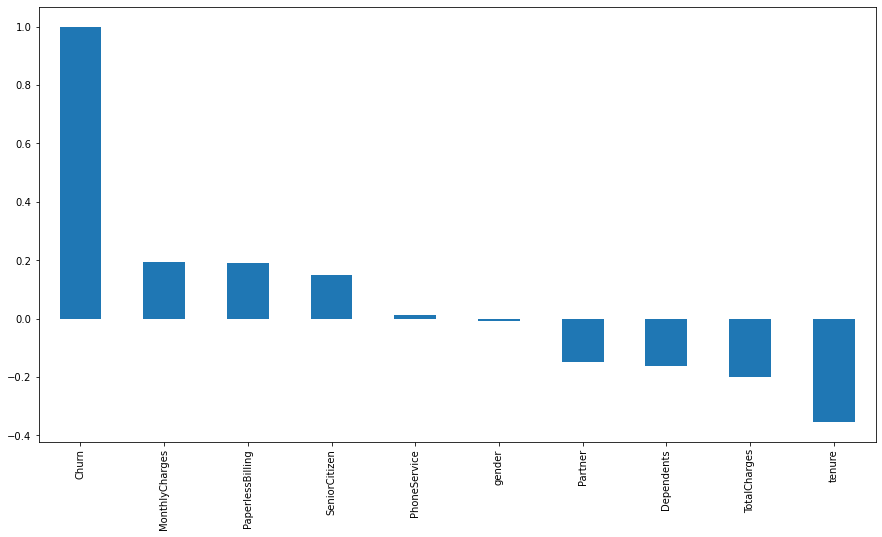

In [19]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

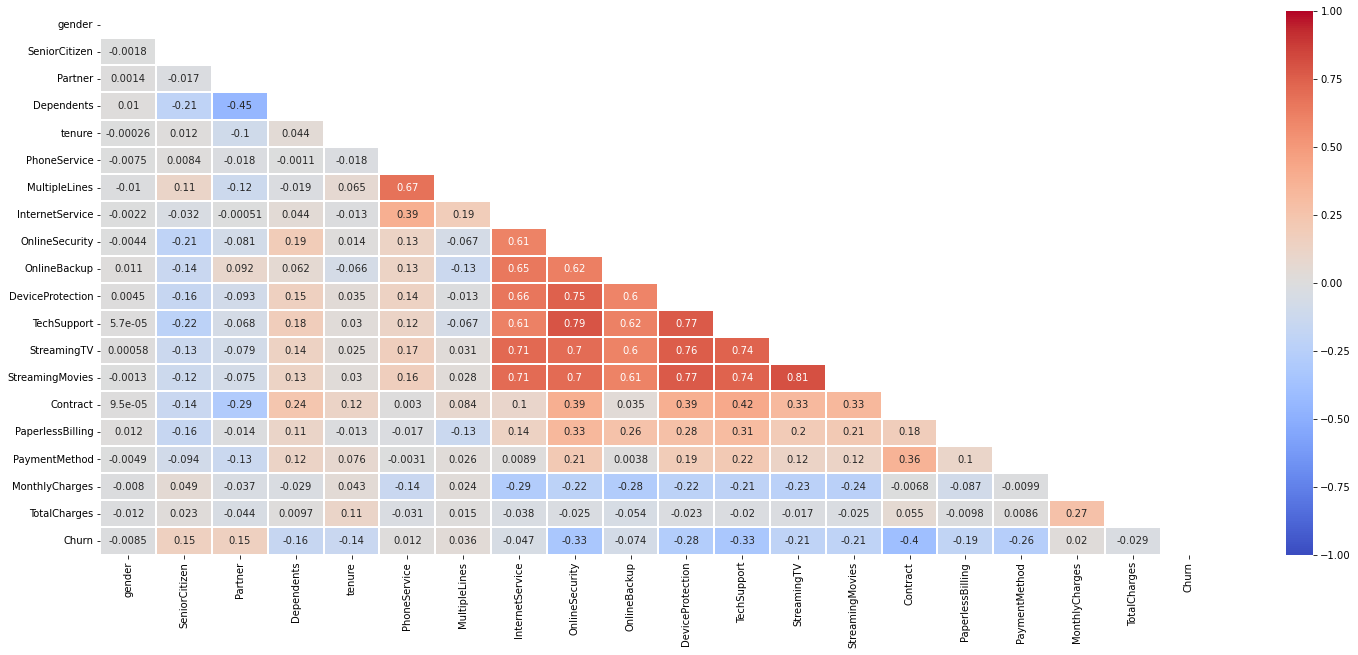

In [20]:
# Correlation between all variables
plt.figure(5, figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

The strongest correlations are on the services level between perquisites for service (e.g., PhoneService and MultipleLines, InternetServices and related additional Internet base services) and between Internet services themselves (probably part of the same service package).

b)     Correlation between churn and selected boolean and numeric variables

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

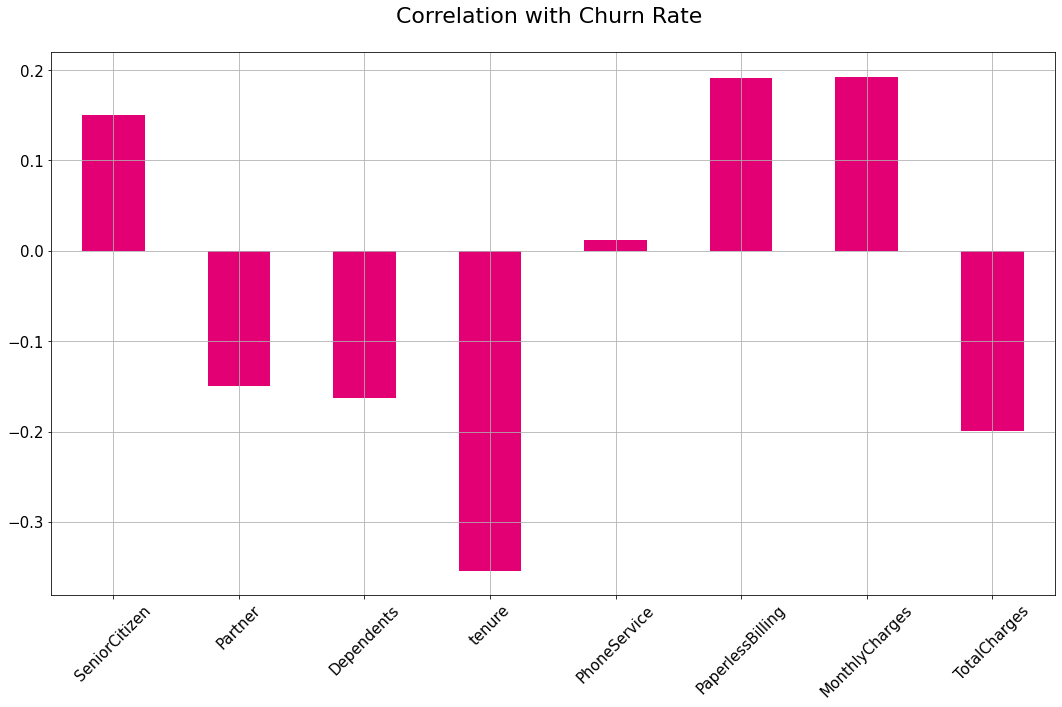

In [21]:
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)
ds_corr = df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

correlations = ds_corr.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#e20074',
        rot = 45, grid = True)

plt.title('Correlation with Churn Rate \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")


There is a positive correlation between churn and the age of customers - most senior citizens churn. 
Logically, longer tenure could also mean more loyalty and less churn risk.
It is also logical that more monthly charges can result in more churn risk.

However, it is interesting that total charges show a negative correlation to churn. The explanation can be that total charges also depend on the time the customer has spent with a company (tenure has a negative correlation). 


Hot encoding for categorical data
Before we continue, the additional transformation of data is needed. In the previous step, we used Label Encoding Binary data. That prepared independent variables with only numerical values for machine learning algorithms.
As we explained, Machine Learning algorithms require numerical values for their independent variables. We will introduce dummy columns for independent variables that have categorical data with more than two unique values.

In [22]:
# First we will copy data to new 'dataset' variable to conserve original values
dataset = df.copy()

# Hot-Encoding for categorical data
dataset = pd.get_dummies(dataset)

Text(0.5, 1.0, 'Correlation: Contract type vs. Churn \n')

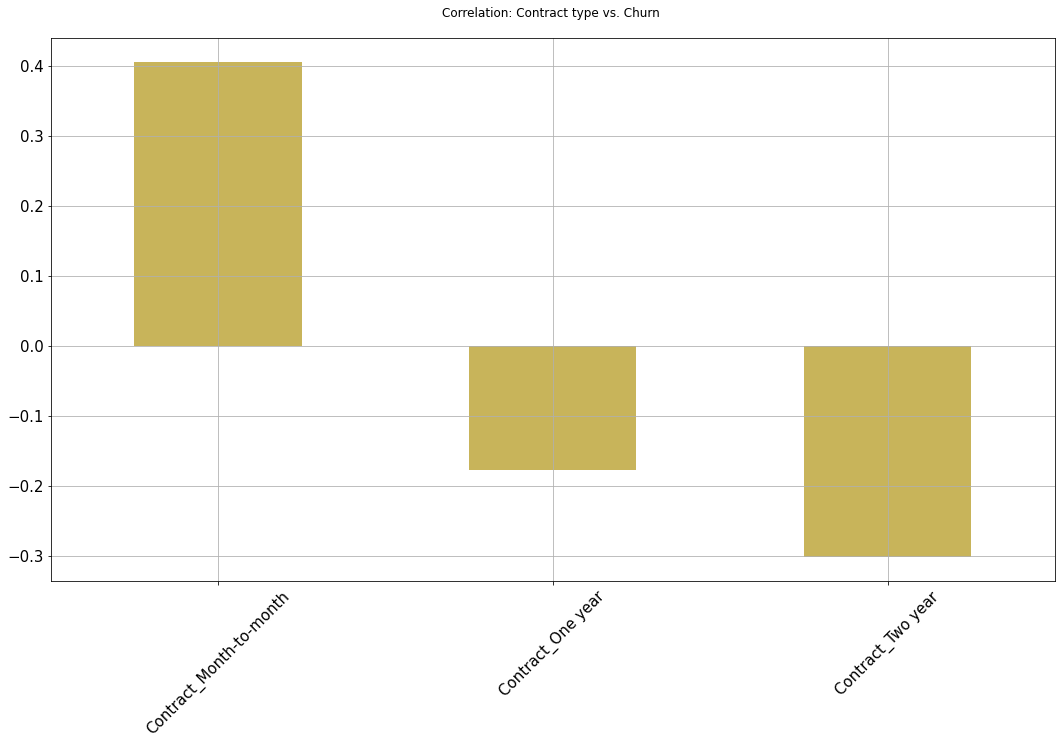

In [23]:
# Correlation: Contract type vs. Churn
plt.figure(7)

ds_contract_type_corr = \
    dataset[['Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']]

correlations = ds_contract_type_corr.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#c8b45a',
        rot = 45, grid = True)

plt.title('Correlation: Contract type vs. Churn \n')

Month-to-month type of subscription is most exposed to a churn risk. Longer contract duration is a good churn prevention mechanism.

Text(0.5, 1.0, 'Correlation: Payment method vs. Churn \n')

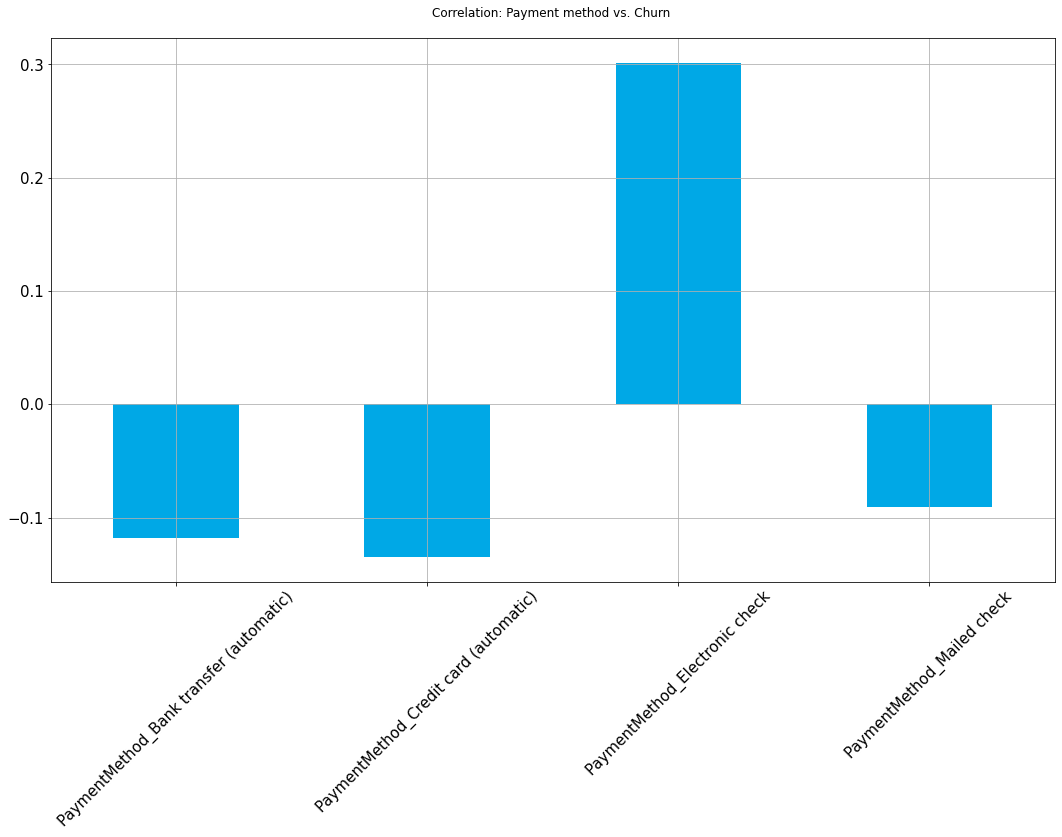

In [24]:
# Correlation: PaymentMethod vs. Churn
plt.figure(8)

ds_payment_method_corr = \
    dataset[['PaymentMethod_Bank transfer (automatic)', \
          'PaymentMethod_Credit card (automatic)', \
          'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

correlations = ds_payment_method_corr.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#00a8e6',
        rot = 45, grid = True)

plt.title('Correlation: Payment method vs. Churn \n')

Reasons for a positive correlation between electronic check as a payment method and Churn have to be investigated.

Multicollinearity
A high correlation between two or more independent variables leads to a phenomenon in data science called multicollinearity. 

VIF (Variable Inflation Factors) is a great tool to check multicollinearity. VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts at 1, and if the 10 value is exceeded, that will indicate high multicollinearity between the independent variables.

In [25]:
# MULTICOLLINEARITY 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
# Calculating Variable Inflation Factors
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["Variable Inflation Factors"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

ds_vif = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents',\
                    'tenure', 'PhoneService', 'PaperlessBilling', \
                    'MonthlyCharges','TotalCharges']]

vif = calculate_vif(ds_vif)

We can notice that the features "Monthly Charges" and "Total Charges" have a high VIF value. Let's use a scatter graph and plot "Monthly Charges" and "Total Charges" values to check how they correlate.


Text(0.5, 1.0, 'Monthly Charges vs. Total Charges collinearity \n')

<Figure size 432x288 with 0 Axes>

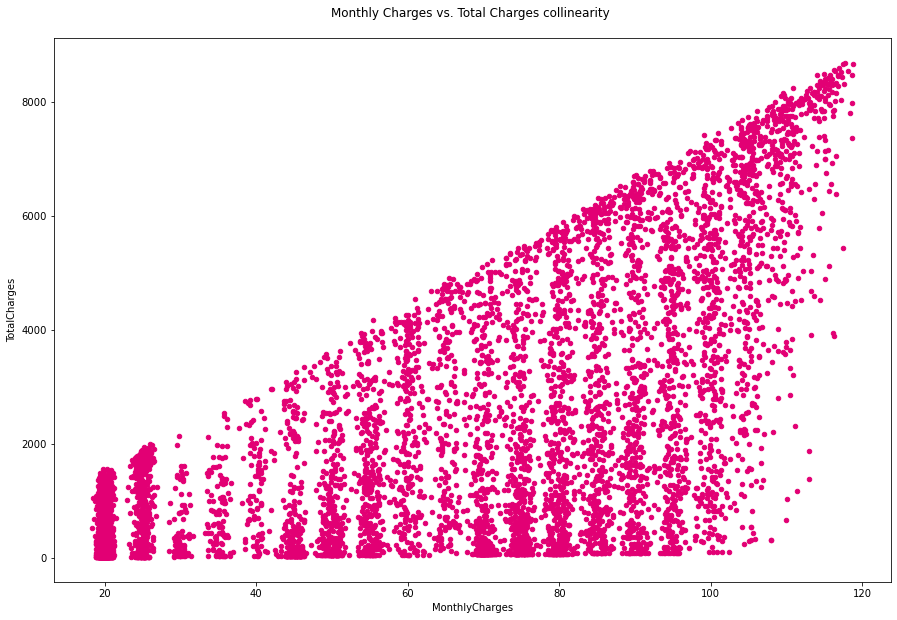

In [26]:
plt.figure(9)
ds_vif[['MonthlyCharges', 'TotalCharges']]\
            .plot.scatter(figsize = (15, 10),
                  x ='MonthlyCharges',
                  y='TotalCharges',
                  color = '#e20074')

plt.title('Monthly Charges vs. Total Charges collinearity \n')

From the scatter graph, we can see that variables (features) "TotalCharges" and"Monthly Charges" are collinear. Dropping one of those features will reduce the multicollinearity between correlated features. The best approach is to drop the "Total Charges" feature and keep the "Monthly Charges" variable due to its high positive correlation with Churn.


In [27]:
# we will drop 'TotalCharges' from VIF test dataset
ds_vif2 = ds_vif.drop(columns = "TotalCharges")

# check colinearity again
vif2 = calculate_vif(ds_vif2)

Dropping the "Total Charges" variable reduced the multicollinearity between correlated features in the test dataset (including "tenure").
Next, "Total Charges" must also be dropped from the main dataset used for Machine Learning algorithms in the final stage of our analysis.

In [31]:
# Split the dataset into dependent and independent variables
X = dataset.drop(columns = ['Churn'])
y = dataset['Churn'].values

from sklearn.model_selection import train_test_split

# "train_test_split" will split arrays or matrices into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42, stratify=y)

In [32]:
# Let’s introduce a DataFrame for comparison of ML algorithms.
model_comparison = pd.DataFrame(columns=['Model','Accuracy','Execution time'])

In [33]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()

# mesuremnet of execution time
import time
t0 = time.time()
logistic_regression_model.fit(X_train, y_train)
t1 = time.time()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
accuracy_logistic_regression = logistic_regression_model.score(X_test,y_test)
print("\n\n-----------------------------------------------------------")
print("Accuracy of Logistic Regression: ", accuracy_logistic_regression)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")



-----------------------------------------------------------
Accuracy of Logistic Regression:  0.8
Execution time: 0.72836828 seconds
-----------------------------------------------------------


In [35]:
#classification report
from sklearn.metrics import confusion_matrix, classification_report

logistic_regression_prediction = logistic_regression_model.predict(X_test)
logistic_regression_report = classification_report(y_test, logistic_regression_prediction)

print(logistic_regression_report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.55      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



Metrics Definition

Precision - is defined as the ratio of true positives to the sum of true and false positives.

Recall - defined as the ratio of true positives to the sum of true positives and false negatives.

F1 Score - is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

Support - is the number of actual occurrences of the class in the dataset. It doesn’t vary between models; it just diagnoses the performance evaluation process.

Confusion matrix

A confusion matrix is a table used to describe the performance of a classification model on a data set used for test and for which the true values are known.

<Figure size 432x288 with 0 Axes>

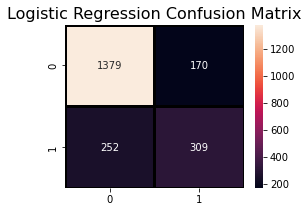

In [36]:
plt.figure(10)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, logistic_regression_prediction),
                annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Logistic Regression Confusion Matrix", fontsize=16)
plt.show()

In [37]:
model_comparison = model_comparison.append(
    {'Model': 'Logistic Regression',
     'Accuracy': accuracy_logistic_regression,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_2172\2876314867.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(




-----------------------------------------------------------
Accuracy of Decision Tree:  0.7061611374407583
Execution time: 0.07812500 seconds
-----------------------------------------------------------


<Figure size 432x288 with 0 Axes>

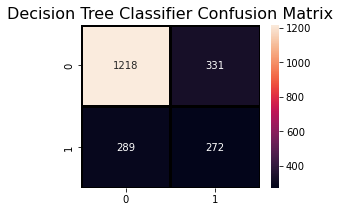

C:\Users\USER\AppData\Local\Temp\ipykernel_2172\2480634946.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(


In [38]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

t0 = time.time()
decision_tree_model.fit(X_train,y_train)
t1 = time.time()
 
accuracy_decision_tree = decision_tree_model.score(X_test, y_test)
print("\n\n-----------------------------------------------------------")
print("Accuracy of Decision Tree: ", accuracy_decision_tree)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")

# Decision Tree Classifier gives very low accuracy score.

decision_tree_prediction = decision_tree_model.predict(X_test)

plt.figure(11)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, decision_tree_prediction),
                annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("Decision Tree Classifier Confusion Matrix", fontsize=16)
plt.show()

model_comparison = model_comparison.append(
    {'Model': 'Decision Tree Classifier',
     'Accuracy': accuracy_decision_tree,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(




-----------------------------------------------------------
Accuracy of Random Forest:  0.7962085308056872
Execution time: 5.80598545 seconds
-----------------------------------------------------------


<Figure size 432x288 with 0 Axes>

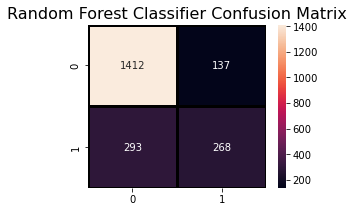

C:\Users\USER\AppData\Local\Temp\ipykernel_2172\4177433355.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(


In [39]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=500,
                                  oob_score = True, n_jobs = -1,
                                  random_state=42, max_features = "auto",
                                  max_leaf_nodes = 30)

t0 = time.time()
random_forest_model.fit(X_train, y_train)
t1 = time.time()

accuracy_random_forest = random_forest_model.score(X_test, y_test)

print("\n\n-----------------------------------------------------------")
print("Accuracy of Random Forest: ", accuracy_random_forest)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")

random_forest_prediction = random_forest_model.predict(X_test)

plt.figure(12)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, random_forest_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("Random Forest Classifier Confusion Matrix", fontsize=16)
plt.show()

model_comparison = model_comparison.append(
    {'Model': 'Random Forest Classifier',
     'Accuracy': accuracy_random_forest,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)



-----------------------------------------------------------
Accuracy of Support Vector Machine:  0.7829383886255924
Execution time: 3.93099070 seconds
-----------------------------------------------------------


<Figure size 432x288 with 0 Axes>

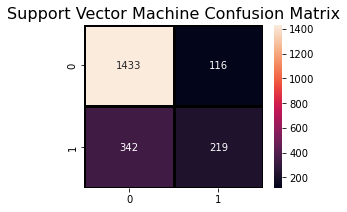

C:\Users\USER\AppData\Local\Temp\ipykernel_2172\966376863.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(


In [40]:
# SUPPORT VECTOR MACHINE

from sklearn.svm import SVC

svc_model = SVC(random_state = 42)

t0 = time.time()
svc_model.fit(X_train,y_train)
t1 = time.time()

accuracy_svc = svc_model.score(X_test,y_test)

print("\n\n-----------------------------------------------------------")
print("Accuracy of Support Vector Machine: ", accuracy_svc)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")

svc_prediction = svc_model.predict(X_test)

plt.figure(13)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, svc_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)


plt.title("Support Vector Machine Confusion Matrix", fontsize=16)
plt.show()

model_comparison = model_comparison.append(
    {'Model': 'Support Vector Machine',
     'Accuracy': accuracy_svc,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)



-----------------------------------------------------------
Accuracy of K-Nearest Neighbor:  0.7744075829383886
Execution time: 0.01562858 seconds
-----------------------------------------------------------


<Figure size 432x288 with 0 Axes>

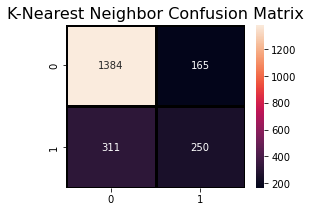

C:\Users\USER\AppData\Local\Temp\ipykernel_2172\2598057557.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append(


In [41]:
# K-NEAREST NEIGHBOR (KNN)

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 10)

t0 = time.time()
knn_model.fit(X_train,y_train)
t1 = time.time()

accuracy_knn = knn_model.score(X_test,y_test)

print("\n\n-----------------------------------------------------------")
print("Accuracy of K-Nearest Neighbor: ", accuracy_knn)
print("Execution time: %0.8f seconds" % (t1 - t0))
print("-----------------------------------------------------------")

knn_prediction = knn_model.predict(X_test)

plt.figure(14)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, knn_prediction),
                annot=True, fmt = "d", linecolor="k", linewidths=3)

plt.title("K-Nearest Neighbor Confusion Matrix", fontsize=16)
plt.show()

model_comparison = model_comparison.append(
    {'Model': 'K-Nearest Neighbor',
     'Accuracy': accuracy_knn,
     'Execution time': '%0.8f seconds' % (t1 - t0)}, ignore_index = True)

Model comparison

Our model comparison was made on only two simple measures: ”Accuracy” and ”Execution time.” More complex metrics can be developed, and model performance can significantly improve with hypertuning of parameters in ML Models.
Even when we look at the results, it is clear that some models provide optimal accuracy and execution time. In some situations, we need high accuracy, and time is not a factor. In other cases, fast decision-making is required, and “false positives” are not a problem (e.g., search engines).
This led us to the end of this tutorial!
Now you have firsthand experience with some basics of machine learning, and you learned some cool Python tricks.
Start exploring the data science universe!